# **Data Visualization in Python**

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from bqplot import pyplot as bplt
from bqplot import * # iffy import

# ----------------------
import warnings
warnings.filterwarnings('ignore')
# ----------------------

# Basic Plots in Python

* ### 2D Scatter Plots

* ### 2D Time Series Line Plots

* ### 2D KDE Plot

* ### 3D Line Plots

* ### 3D Scatter Plots

* ### 3D KDE Plot

* ### 3D Wireframe Plots

* ### 3D Mesh Plot


# **2D Plots**

## Simple Scatter Plot

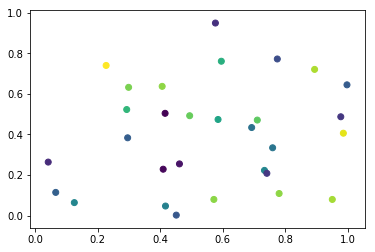

In [2]:
N = 30 # number of points

x = np.random.rand(N)
y = np.random.rand(N)

colors = np.random.rand(N)
plt.scatter(x, y, c=colors)

## Scaled Scatter Plot w/ Colors

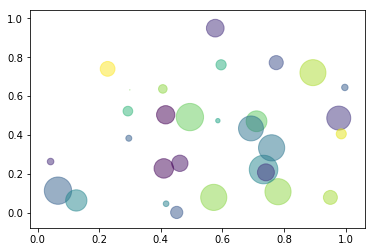

In [3]:
scaling = (30 * np.random.rand(N))**2
plt.scatter(x, y, s=scaling, c=colors, alpha=0.5)

## 2D Time Series Plot w/ Seaborn

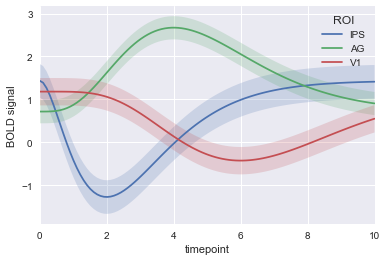

In [4]:
sns.set(style="darkgrid")
gammas = sns.load_dataset("gammas")
sns.tsplot(time="timepoint", value="BOLD signal", unit="subject", condition="ROI", data=gammas)

## 2D Shaded Kernel Density Plot

[]

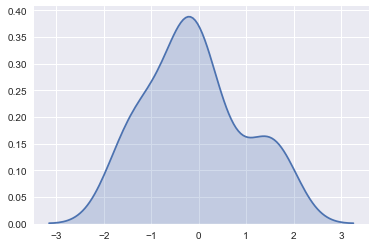

In [5]:
x = np.random.normal(0, 1, size=N)
sns.kdeplot(x, shade=True)
plt.plot()

## 2D Kernel Density Plot - Effect of Bandwidth

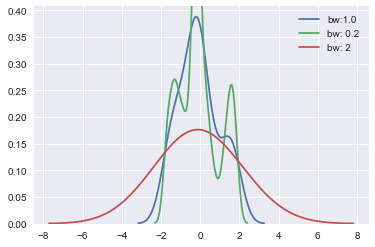

In [6]:
sns.kdeplot(x, label="bw:1.0")
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

# 3D  Plots

## 3D KDE Plot

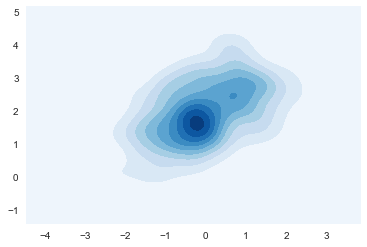

In [7]:
N = 500 # size
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=N).T

sns.kdeplot(x, y, cmap='Blues', shade=True)

plt.show()

## Contour Joint Plot

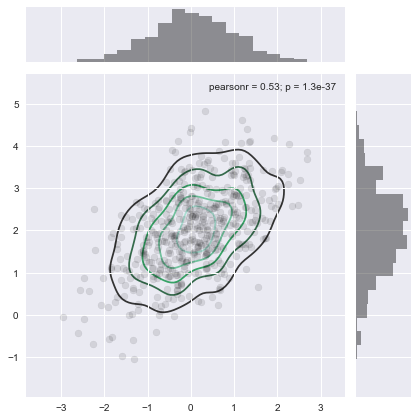

In [8]:
N = 500 # size
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=N).T

(sns.jointplot(x, y, color="k", alpha=0.1).plot_joint(sns.kdeplot, zorder=0, n_levels=6)) # contour plot with scatter

## KDE Joint Plot

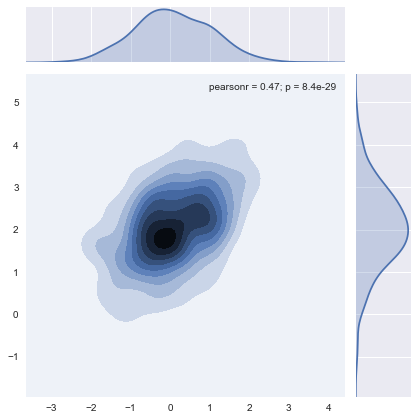

In [9]:
N = 500 # size
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=N).T

sns.jointplot(x, y, kind="kde")

## Hex Joint Plot

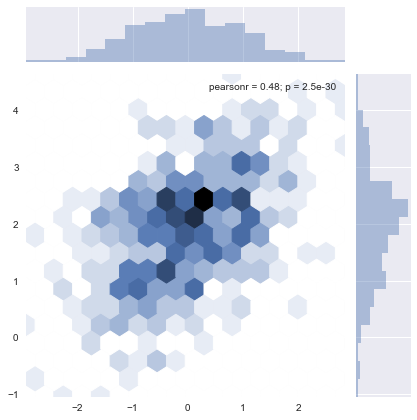

In [10]:
N = 500 # size
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=N).T

sns.jointplot(x, y, kind="hex")

## Creating a 3D Plotting Space

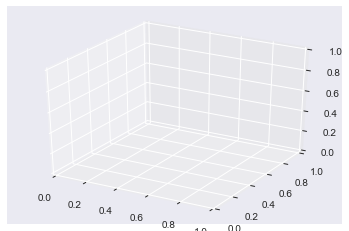

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # creates empty 3D plot frame

## Basic 3D Line Plot

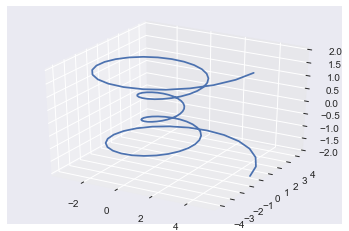

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.cos(theta)
y = r * np.sin(theta)

ax.plot(x, y, z) # plots a parametric curve
plt.show()

## More Advanced 3D 'Line' Plot

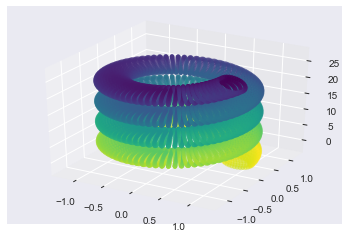

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(0, 25, 10000) # needs way more datapoints than previous example

x = (1 + 0.25*np.cos(75*theta))*np.cos(theta)
y = (1 + 0.25*np.cos(75*theta))*np.sin(theta)
z = theta + 2*np.sin(75*theta)

ax.scatter(x, y, z, c=cm.viridis_r(np.abs(z/np.amax(z))), edgecolor='none') # use scatter plot and normalized colormap

plt.show()

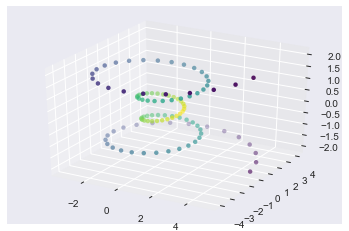

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.cos(theta)
y = r * np.sin(theta)

ax.scatter(x, y, z, c=cm.viridis_r(np.abs(z/np.amax(z))), edgecolor='none')
plt.show()

## 3D Wireframe Plot

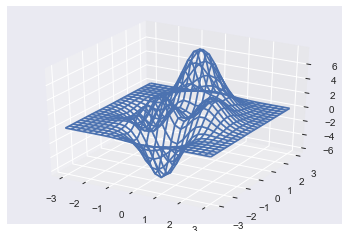

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

N = 25 # data points per axis

x = y = np.linspace(-3, 3, N)

X, Y = np.meshgrid(x, y)

Z = 3 * (1-X)**2 * np.exp(-(X**2) - (Y+1)**2) - 10*(X/5 - X**3 - Y**5) * \
    np.exp(-X**2 - Y**2) - 1/3 * np.exp(-(X+1)**2 - Y**2)
    
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z)

plt.show()

## Colored 'Wireframe' Plot

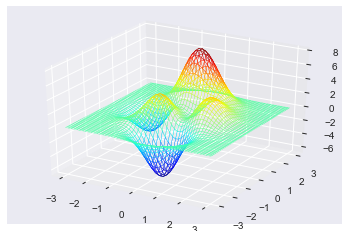

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

N = 100 # data points / axis

x = y = np.linspace(-3, 3, N)

X, Y = np.meshgrid(x, y)

Z = 3 * (1-X)**2 * np.exp(-(X**2) - (Y+1)**2) - 10*(X/5 - X**3 - Y**5) * \
    np.exp(-X**2 - Y**2) - 1/3 * np.exp(-(X+1)**2 - Y**2)
    
# We actually have to use a surface plot in order to have a 'wireframe'
# This plot requires normalization of Z axisto [0, 1] for cmap
surf = ax.plot_surface(X, Y, Z, facecolors=cm.jet((Z-Z.min())/(Z.max()-Z.min())), shade=False)
surf.set_facecolor((0,0,0,0))
plt.show()

## Colored Surface Plot

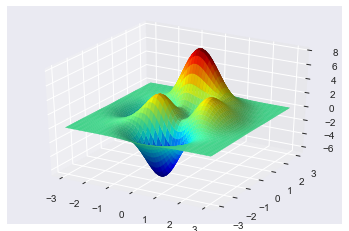

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

N = 100 # data points / axis

x = y = np.linspace(-3, 3, N)

X, Y = np.meshgrid(x, y)

Z = 3 * (1-X)**2 * np.exp(-(X**2) - (Y+1)**2) - 10*(X/5 - X**3 - Y**5) * \
    np.exp(-X**2 - Y**2) - 1/3 * np.exp(-(X+1)**2 - Y**2)
    
# Surface plot (color is normalized on Z)
surf = ax.plot_surface(X, Y, Z, facecolors=cm.jet((Z-Z.min())/(Z.max()-Z.min())), shade=True)
plt.show()

## Interactive Plot Example

In [18]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# imports for interactive plots

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## Video Animations

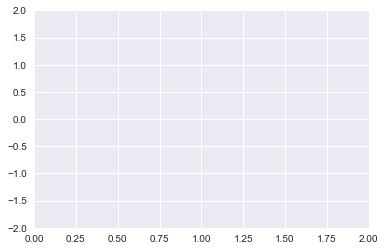

In [19]:
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2) # empty plot





In [20]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)



# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

## Traveling Salesman Animation by Local Video

In [21]:
%%HTML
<video width="1000" height="600" loop="true" controls autoplay>
  <source src="tsp.mp4" type="video/mp4">
</video>

## Seaborn Box Plot

(0, 50)

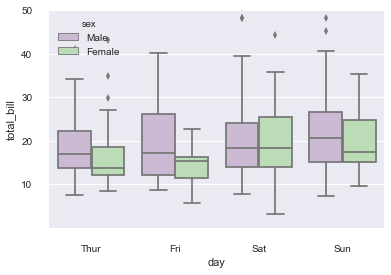

In [22]:
# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
bp = sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

axes = bp.axes
axes.set_ylim(0,50)

## Seaborn Violin Plot

(0, 50)

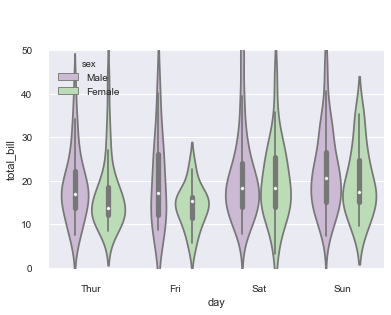

In [23]:
vp = sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

axes = vp.axes
axes.set_ylim(0,50)

## Seaborn Violin Plot with Swarm Plot

(0, 50)

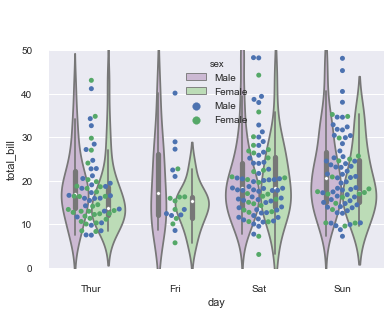

In [24]:
vp = sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
sns.despine(offset=10, trim=True)

axes = vp.axes
axes.set_ylim(0,50)

## Word Frequencies with NLTK

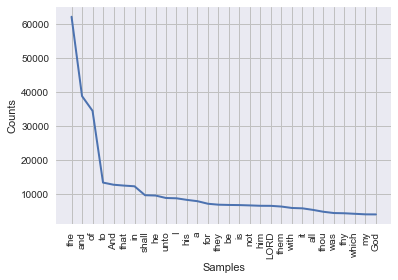

In [25]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

file_name = 'bible.txt'

f = open(file_name, "r")
inputfile = f.read()
#tokens = nltk.tokenize.word_tokenize(inputfile)
tokens = [word for sent in sent_tokenize(inputfile) for word in word_tokenize(sent)]
filtered = filter(lambda word: word not in ',-.;:', tokens)
fd = nltk.FreqDist(filtered)
fd.plot(30,cumulative=False)

## Putting it Together

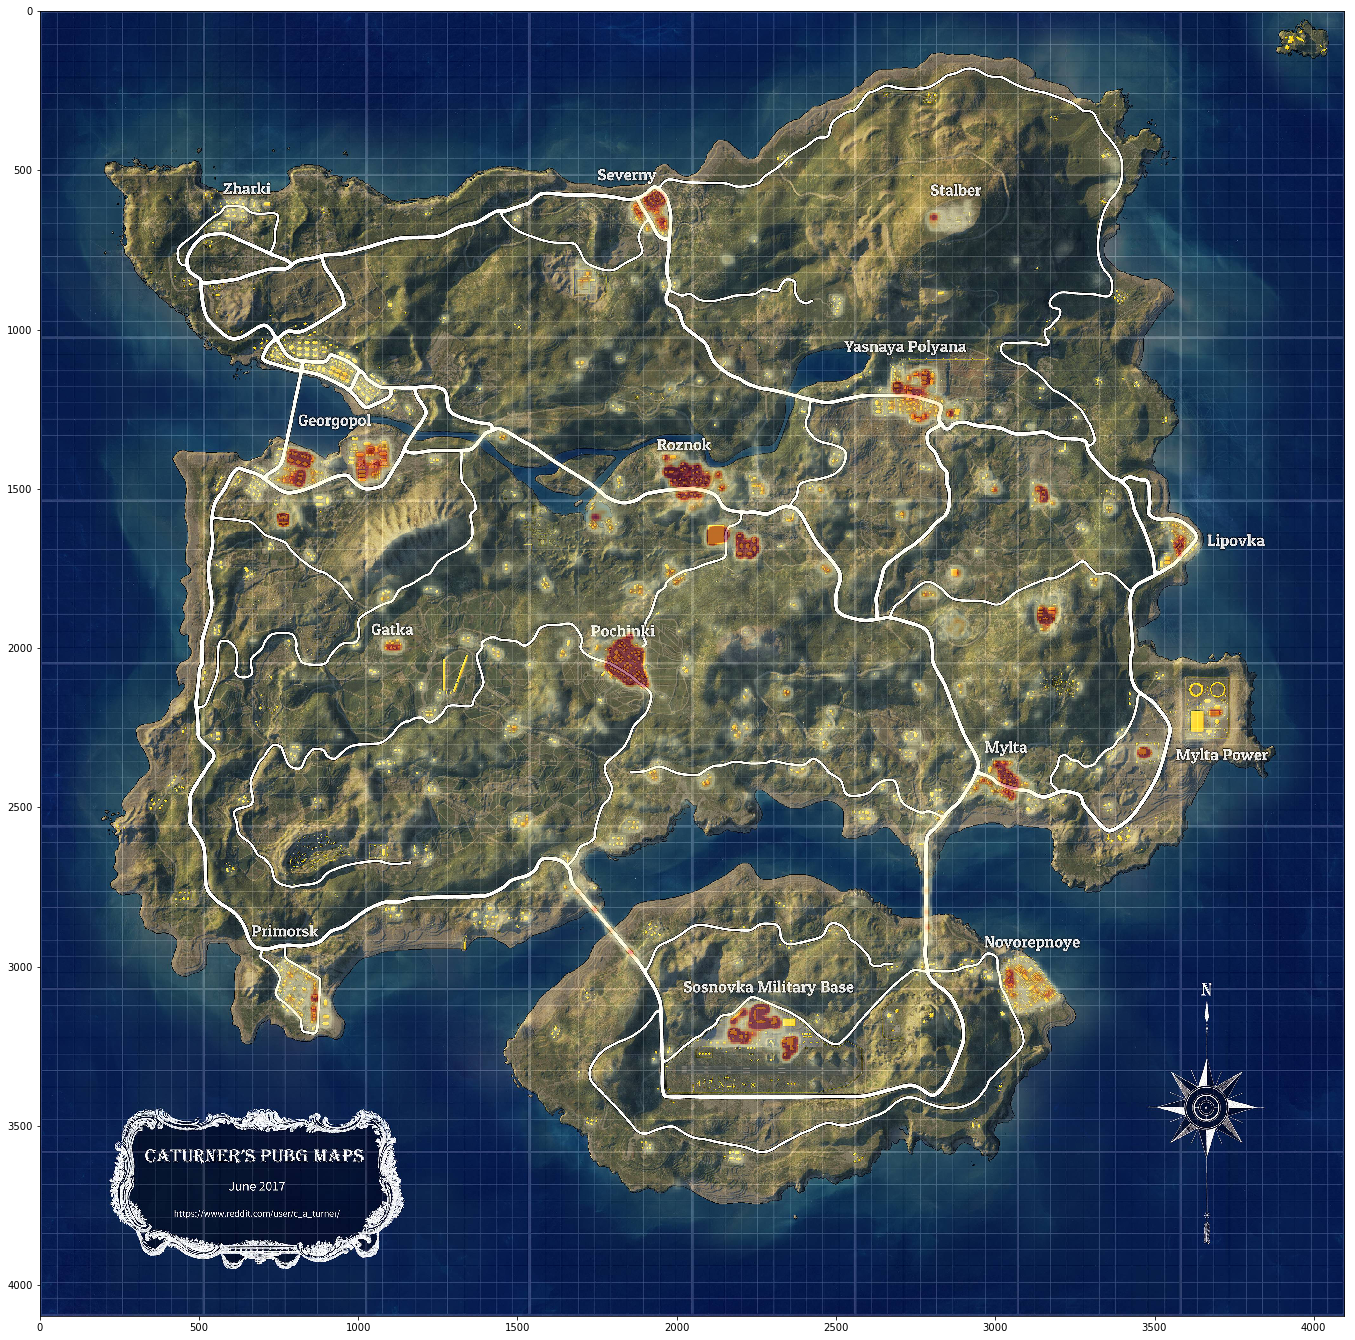

In [6]:
# https://www.kaggle.com/michaelapers/pubg-kill-death-heatmaps/data

from scipy.misc.pilutil import imread
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm
from matplotlib.colors import Normalize


df = pd.read_csv('pubg/PUBG_MatchData_Flattened.tsv', sep='\t')

edf = df.loc[df['map_id'] == 'ERANGEL']

def killer_victim_df_maker(df):
    victim_x_df = df.filter(regex='victim_position_x')
    victim_y_df = df.filter(regex='victim_position_y')
    killer_x_df = df.filter(regex='killer_position_x')
    killer_y_df = df.filter(regex='killer_position_y')

    victim_x_s = pd.Series(victim_x_df.values.ravel('F'))
    victim_y_s = pd.Series(victim_y_df.values.ravel('F'))
    killer_x_s = pd.Series(killer_x_df.values.ravel('F'))
    killer_y_s = pd.Series(killer_y_df.values.ravel('F'))

    vdata={'x': victim_x_s, 'y':victim_y_s}
    kdata={'x': killer_x_s, 'y':killer_y_s}

    victim_df = pd.DataFrame(data = vdata).dropna(how='any')
    victim_df = victim_df[victim_df['x']>0]
    killer_df = pd.DataFrame(data = kdata).dropna(how='any')
    killer_df = killer_df[killer_df['x']>0]
    return killer_df,victim_df

ekdf,evdf = killer_victim_df_maker(edf)

# resize map

plot_data_ev = evdf[['x', 'y']].values
plot_data_ek = ekdf[['x', 'y']].values

plot_data_ev = plot_data_ev*4040/800000
plot_data_ek = plot_data_ek*4040/800000

    
def heatmap(x, y, s, bins=100):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent
    
bg = imread('pubg/erangel.jpg')

hmap, extent = heatmap(plot_data_ev[:,0], plot_data_ev[:,1], 1.5, bins=800)
alphas = np.clip(Normalize(0, hmap.max()/100, clip=True)(hmap)*1.5, 0.0, 1.)
colors = Normalize(hmap.max()/100, hmap.max()/20, clip=True)(hmap)
colors = cm.YlOrRd(colors)
colors[..., -1] = alphas

fig, ax = plt.subplots(figsize=(24,24))
ax.set_xlim(0, 4096); ax.set_ylim(0, 4096)
ax.imshow(bg)
ax.imshow(colors, extent=extent, origin='lower', cmap=cm.rainbow, alpha=0.5)
plt.gca().invert_yaxis()